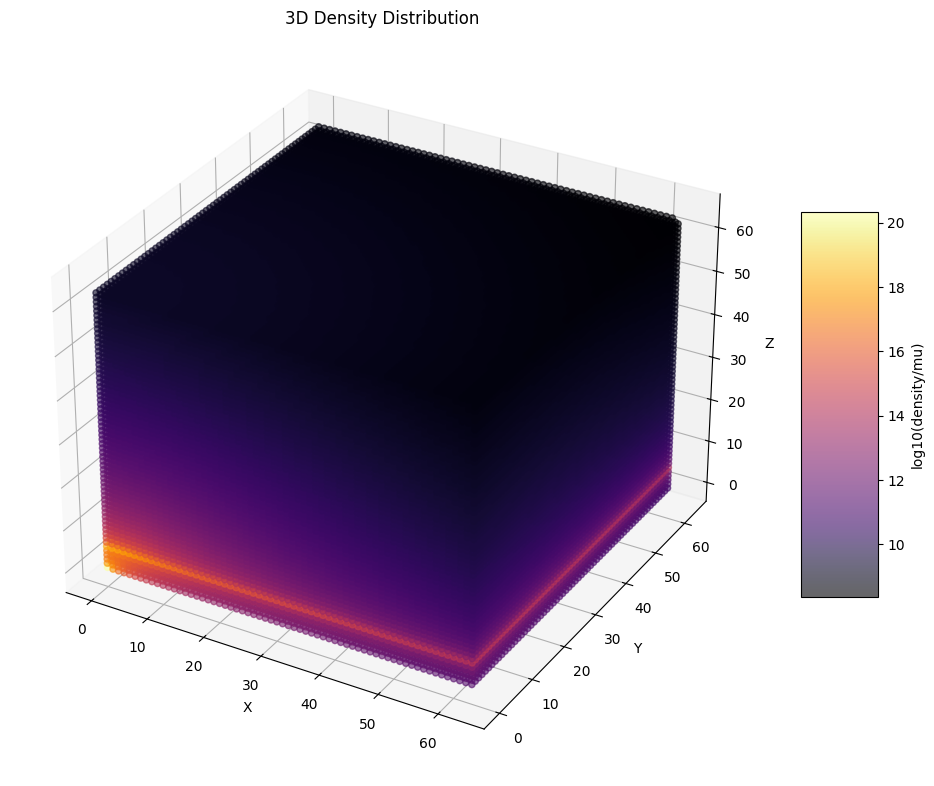

<Figure size 640x480 with 0 Axes>

In [10]:
import numpy as np
import matplotlib.pyplot as plt


wind_density_data = np.loadtxt('parameters/wind_density_output.csv', delimiter=',')


data_3d_correct = wind_density_data.reshape(64, 64, 64) 


mu = 2.3e-24  

f_xyz_full = np.log10(data_3d_correct / mu)


threshold_full = np.percentile(f_xyz_full, 0)


x_full, y_full, z_full = np.indices(f_xyz_full.shape)


mask_full = f_xyz_full > threshold_full
x_plot_full, y_plot_full, z_plot_full, f_xyz_plot_full = x_full[mask_full], y_full[mask_full], z_full[mask_full], f_xyz_full[mask_full]


fig_full = plt.figure(figsize=(12, 10))
ax_full = fig_full.add_subplot(111, projection='3d')
scatter = ax_full.scatter(x_plot_full, y_plot_full, z_plot_full, c=f_xyz_plot_full, cmap='inferno', marker='o', alpha=0.6)
fig_full.colorbar(scatter, shrink=0.5, aspect=5, label='log10(density/mu)')
ax_full.set_title('3D Density Distribution')
ax_full.set_xlabel('X')
ax_full.set_ylabel('Y')
ax_full.set_zlabel('Z')
plt.show()
plt.savefig('3d.png', dpi=300, format='png')
plt.show()
